<a href="https://colab.research.google.com/github/ankesh86/DiffusionModels/blob/main/inpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-guided image-inpainting

The [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline) allows you to edit specific parts of an image by providing a mask and a text prompt. It uses a version of Stable Diffusion, like [`runwayml/stable-diffusion-inpainting`](https://huggingface.co/runwayml/stable-diffusion-inpainting) specifically trained for inpainting tasks.

Get started by loading an instance of the [StableDiffusionInpaintPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/inpaint#diffusers.StableDiffusionInpaintPipeline):

In [1]:
!pip install diffusers transformers ftfy accelerate

import PIL
import torch
from io import BytesIO
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInpaintPipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.5 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_

(-0.5, 4499.5, 3374.5, -0.5)

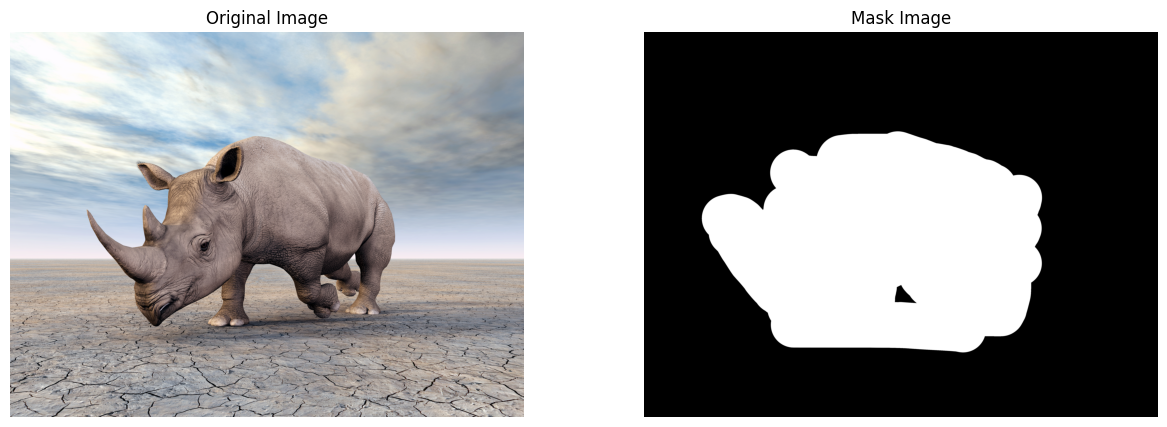

In [3]:
init_image =  load_image("/content/Rhinoceros_LIL_53344.jpeg")
mask_image =  load_image("/content/Rhinoceros_LIL_53344_mask.png")

# Plotting the images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

Now you can create a prompt to replace the mask with something else:

  0%|          | 0/50 [00:00<?, ?it/s]

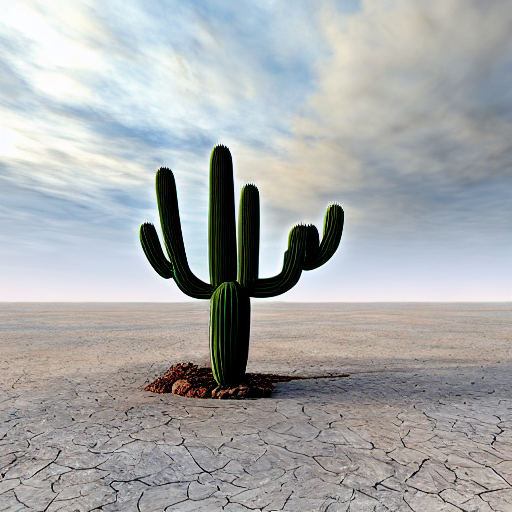

In [4]:
prompt = "cactus in the desert, realistic"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

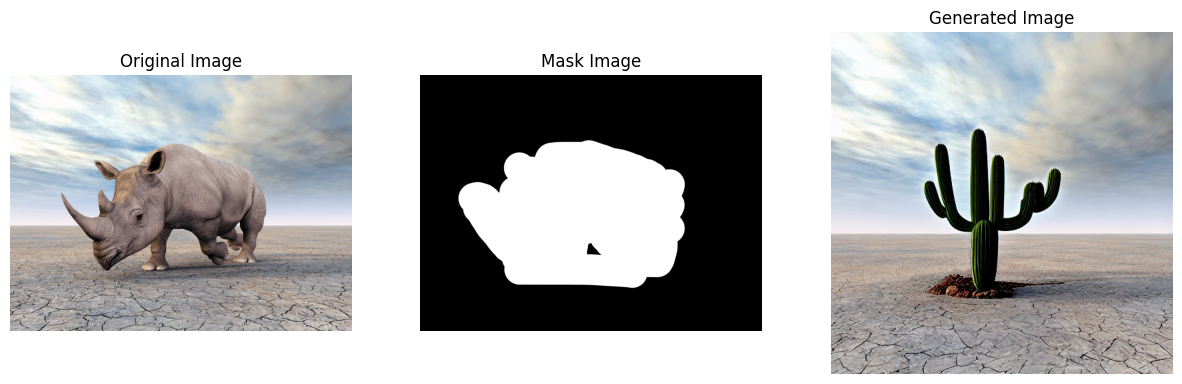

In [5]:

# Plotting the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(init_image)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Turn off axis

axes[1].imshow(mask_image)
axes[1].set_title('Mask Image')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Generated Image')
axes[2].axis('off')

plt.show()